# **Waze**


# **Logistic Regression model**

**The purpose** of this project is to perform exploratory data analysis (EDA) and to create a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This Notebook has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a binomial logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources are needed to complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from the model(s)?

* What business recommendations can be proposed based on the models built?


# **PACE stages**


## **PACE: Plan**

### **Task 1. Imports and data loading**
Import the data and packages that you've learned are needed for building logistic regression models.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Data Analytics/Main Projects/Waze project/waze_dataset.csv'
df0 = pd.read_csv(file_path)

## **PACE: Analyze**

* What are some purposes of EDA before constructing a binomial logistic regression model?

> *Outliers and extreme data values can significantly impact logistic
regression models. After visualizing data, a plan should be made for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.*

>  *EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with dataset means, medians, and other similar methods.*

> *Additionally, it can be useful to create variables by multiplying variables together or calculating the ratio between two variables. For example, in this dataset a drives_sessions_ratio variable can be created by dividing drives by sessions.*

### **Task 2a. Explore data with EDA**

Analyzing and discovering data, looking for correlations, missing data, potential outliers, and/or duplicates:



In [4]:
df0.shape

(14999, 13)

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The `label` column is missing 700 values.

Deleting unnecessary columns:

In [6]:
df = df0.drop(columns=["ID"]).copy()
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Checking the dependent variable balance:

In [7]:
df["label"].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

In [8]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?

> *Yes, the following columns all seem to have outliers:*
<br>
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


> *All of these columns have max values that are multiple standard deviations above the 75th percentile. This could indicate outliers in these variables.*

### **Task 2b. Create features**

Creating features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

Checking variables correlation:

In [9]:
df.corr(method='pearson', numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
sessions,1.000000,0.996822,0.589079,0.005676,0.005713,0.006185,0.002113,-0.006113,0.024194,0.018973
drives,0.996822,1.000000,0.586741,0.005216,0.005017,0.007572,0.001883,-0.005855,0.024043,0.018847
total_sessions,0.589079,0.586741,1.000000,0.004731,0.002137,0.006421,-0.000416,-0.001689,0.013449,0.009912
n_days_after_onboarding,0.005676,0.005216,0.004731,1.000000,0.000435,-0.008075,-0.003213,-0.009646,-0.009725,-0.008563
total_navigations_fav1,0.005713,0.005017,0.002137,0.000435,1.000000,0.002306,-0.007690,0.002097,0.011066,0.010359
total_navigations_fav2,0.006185,0.007572,0.006421,-0.008075,0.002306,1.000000,0.000081,-0.004091,-0.004036,0.001951
driven_km_drives,0.002113,0.001883,-0.000416,-0.003213,-0.007690,0.000081,1.000000,0.697866,-0.002601,-0.005487
duration_minutes_drives,-0.006113,-0.005855,-0.001689,-0.009646,0.002097,-0.004091,0.697866,1.000000,-0.002830,-0.005145
activity_days,0.024194,0.024043,0.013449,-0.009725,0.011066,-0.004036,-0.002601,-0.002830,1.000000,0.947706
driving_days,0.018973,0.018847,0.009912,-0.008563,0.010359,0.001951,-0.005487,-0.005145,0.947706,1.000000


#### **`km_per_driving_day`**

It is known from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It might be helpful to engineer a feature that captures this information.


In [10]:
df["km_per_driving_day"] = df["driven_km_drives"]/df["driving_days"]
df["km_per_driving_day"].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

Converting infinite values to 0:

In [11]:
df.loc[df["km_per_driving_day"] == np.inf,"km_per_driving_day"] = 0
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Creating a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month:

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

In [12]:
df["professional_driver"] = np.where((df["drives"] >=60) & (df["driving_days"] >= 15), 1, 0)

Performing a quick inspection of the new variable:

1. Checking the count of professional drivers and non-professionals.

2. Within each class (professional and non-professional) calculating the churn rate.

In [13]:
# 1. Check count of professionals and non-professionals
df["professional_driver"].value_counts()

0    12405
1     2594
Name: professional_driver, dtype: int64

In [14]:
# 2. Check in-class churn rate
df.groupby(["professional_driver"])["label"].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.


## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.


### **Task 3a. Preparing variables**

Call `info()` on the dataframe to check the data type of the `label` variable and to verify if there are any missing values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int64  
dtypes: float64(4), int64(8

Because we know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, the `dropna()` method will be used to drop the rows that are missing this data.

In [16]:
df.dropna(subset=["label"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
 12  km_per_driving_day       14299 non-null  float64
 13  professional_driver      14299 non-null  int64  
dtypes: float64(4), int64(8

#### **Check for outliers**

Previously, it was determined that seven of the variables had clear signs of containing outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

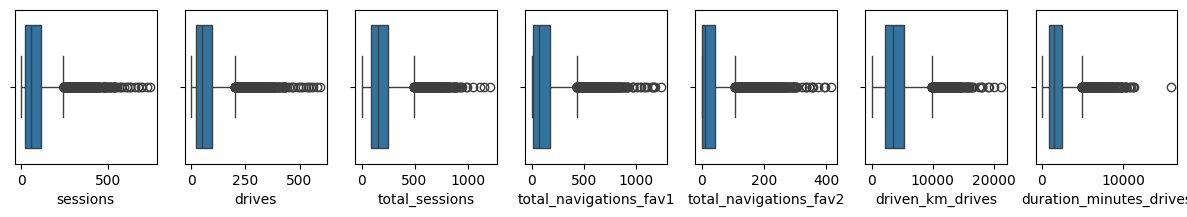

In [17]:
relevant_cols = ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']
def boxplots(columns_list):
    fig,axes = plt.subplots(1,len(columns_list),figsize=(15,2))
    for i, col in enumerate(columns_list):
        sns.boxplot(x=df[col],ax=axes[i])
    plt.show()
boxplots(relevant_cols)

#### **Imputing outliers**

One rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors).

At times outliers can be changed to the **median, mean, 95th percentile, etc.**

For this analysis, we'll impute the outlying values for these columns calculating the **95th percentile** of each column and changing to this value any value in the column that exceeds it.


In [18]:
# Impute outliers
def outlier_handler(column_list):
    for col in column_list:
        upper_limit = df[col].quantile(0.95)
        df.loc[df[col]>upper_limit,col] = upper_limit
        print(f"{col} - Upper limit: {upper_limit}")
outlier_handler(relevant_cols)

sessions - Upper limit: 243.0
drives - Upper limit: 200.0
total_sessions - Upper limit: 455.4394923899998
total_navigations_fav1 - Upper limit: 422.0
total_navigations_fav2 - Upper limit: 124.0
driven_km_drives - Upper limit: 8898.716274999999
duration_minutes_drives - Upper limit: 4668.180091799999


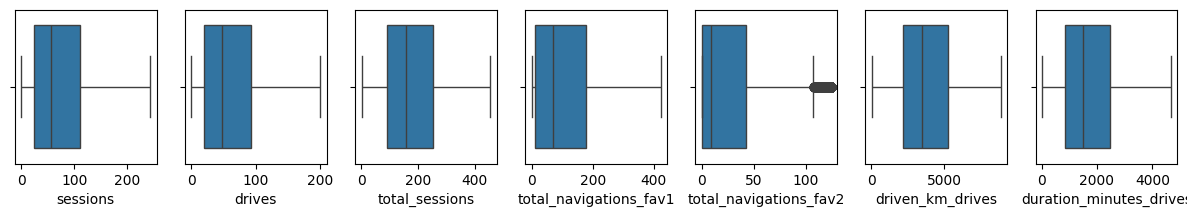

In [19]:
boxplots(relevant_cols)

In [20]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


#### **Encoding categorical variables**

The data type of the `label` column should be changed to be binary. This is needed to train a logistic regression model.

Assigning a `0` for all `retained` users.

Assigning a `1` for all `churned` users.

In [21]:
df["label_bin"] = np.where(df["label"] == "retained",0,1)
df[['label', 'label_bin']].tail()

,label,label_bin
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


#### Upsampling the data

In [22]:
df["label"].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

Approximately 82.2% of the dataset represents retained users and 17.8% represents users who churned. So the outcome variable is not very balanced.

In [23]:
minority_df = df[df["label"] == "churned"]
mayority_df = df[df["label"] == "retained"]

minority_df_upsampled = resample(minority_df,
                                    replace=True,                 # to sample with replacement
                                     n_samples=len(mayority_df), # to match majority class
                                     random_state=0)

df_upsampled = pd.concat([minority_df_upsampled,mayority_df]).reset_index(drop=True)

df_upsampled["label"].value_counts()

churned     11763
retained    11763
Name: label, dtype: int64

### **Task 3b. Determining whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

Checking the correlation among predictor variables. First, generate a correlation matrix.

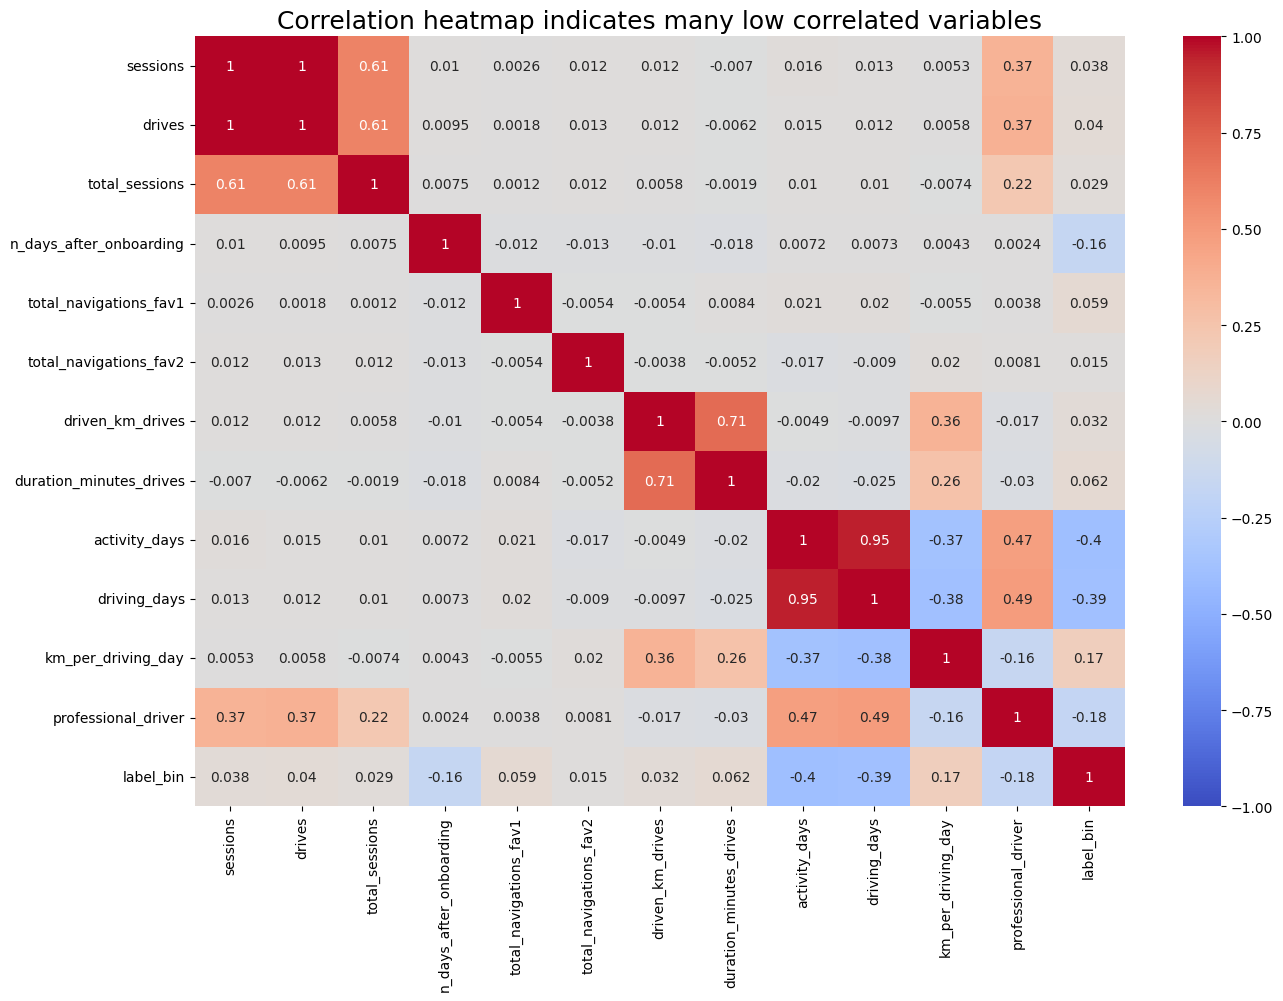

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df_upsampled.corr(method='pearson', numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in the model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*

### **Task 3c. Creating dummies**

**Note:** Variables with many categories should only be dummied if absolutely necessary. Each category will result in a coefficient for the model which can lead to overfitting.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions.
A new binary column called `device_bin` that encodes user devices as follows will be created:

* `Android` -> `0`
* `iPhone` -> `1`

In [25]:
df_upsampled["device_bin"] = np.where(df_upsampled["device"] == "Android", 0, 1)
df_upsampled[["device","device_bin"]].tail()

,device,device_bin
23521,iPhone,1
23522,iPhone,1
23523,Android,0
23524,iPhone,1
23525,iPhone,1


### **Task 3d. Model building**

#### **Assigning predictor variables and target**

To build a model it is needed to determine what X variables to include to predict the target `label_bin`.

The following variables will be dropped and the result assigned to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [26]:
X = df_upsampled.drop(columns=["label","label_bin","device","sessions","driving_days"])

In [27]:
y = df_upsampled["label_bin"]

#### **Split the data**


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17644, 11), (5882, 11), (17644,), (5882,))

We'll use scikit-learn to instantiate a logistic regression model. It is important to add `penalty = None` since the predictors are unscaled.


In [32]:
model = LogisticRegression(penalty=None, max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

In [33]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.002546
total_sessions             0.000253
n_days_after_onboarding   -0.000394
total_navigations_fav1     0.001294
total_navigations_fav2     0.000367
driven_km_drives          -0.000022
duration_minutes_drives    0.000131
activity_days             -0.094882
km_per_driving_day         0.000022
professional_driver       -0.316845
device_bin                -0.014471
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [34]:
model.intercept_

array([1.39327606])

#### **Checking final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

The variable `training_probabilities` is a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [35]:
training_probabilities = model.predict_proba(X_train)
training_probabilities[:5]

array([[0.27187723, 0.72812277],
       [0.403684  , 0.596316  ],
       [0.52570058, 0.47429942],
       [0.38260603, 0.61739397],
       [0.80834923, 0.19165077]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [36]:
logit_data = X_train.copy()

logit_data["logit"] =  [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plotting a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, each continuous or discrete predictor variable should be plotted.

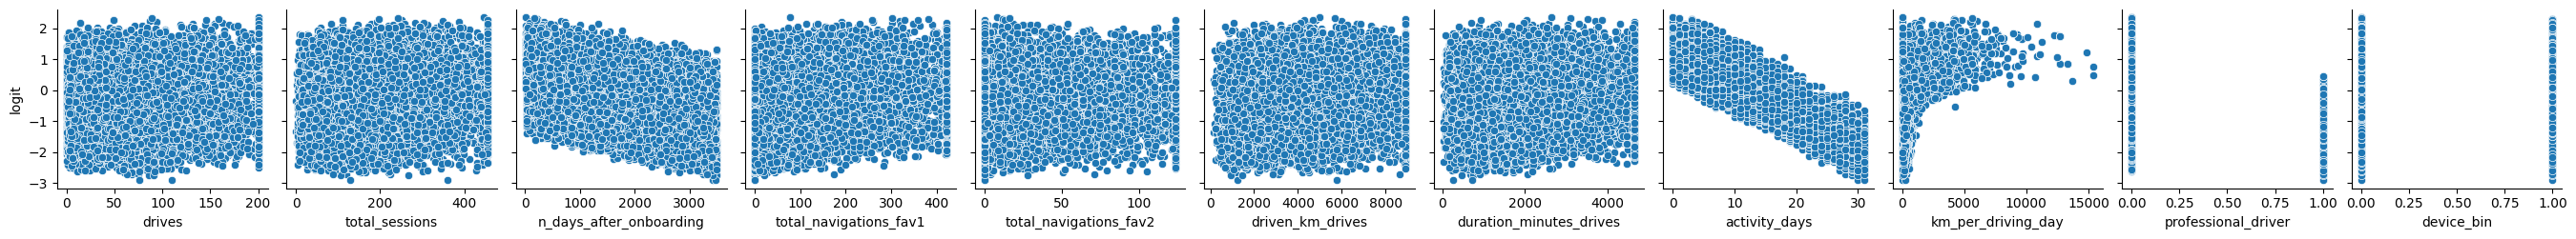

In [40]:
pairplot = sns.pairplot(logit_data, y_vars=['logit'], x_vars=logit_data.columns[:-1])

for i in range(len(logit_data.columns) - 1):
    pairplot.axes[0, i].set_ylabel('logit')
    pairplot.axes[-1, i].set_xlabel(logit_data.columns[i])

plt.show()


## **PACE: Execute**



### **Task 4a. Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.



In [41]:
y_pred = model.predict(X_test)

In [42]:
model.score(X_test, y_test)

0.6936416184971098

### **Task 4b. Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

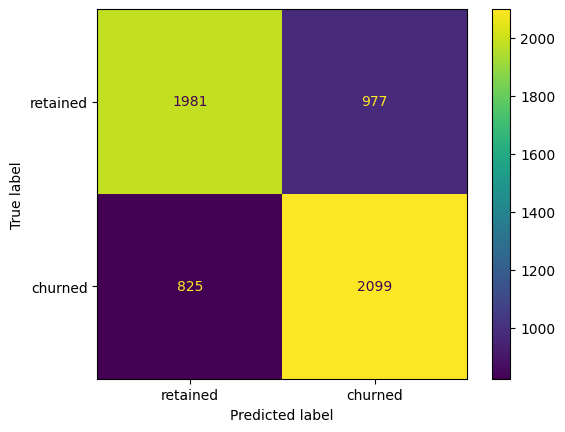

In [43]:
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['retained', 'churned'])

disp.plot()

plt.show()

In [45]:
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.71      0.67      0.69      2958
     churned       0.68      0.72      0.70      2924

    accuracy                           0.69      5882
   macro avg       0.69      0.69      0.69      5882
weighted avg       0.69      0.69      0.69      5882



**Note:** In general, it seems that the model exhibits a fairly balanced performance between the "retained" and "churned" classes, with metrics close to each other. The overall accuracy of 69% indicates the percentage of correct predictions in the dataset.

### **BONUS**

Generating a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [46]:
feature_importance = list(zip(X_train.columns, model.coef_[0]))

feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', 0.0025459460924630506),
 ('total_navigations_fav1', 0.0012936968542889538),
 ('total_navigations_fav2', 0.00036742975326199267),
 ('total_sessions', 0.0002532428034923663),
 ('duration_minutes_drives', 0.0001307074733515876),
 ('km_per_driving_day', 2.2459660709128796e-05),
 ('driven_km_drives', -2.2152633734811618e-05),
 ('n_days_after_onboarding', -0.0003937049739716162),
 ('device_bin', -0.014471227967982673),
 ('activity_days', -0.09488203852512954),
 ('professional_driver', -0.316844553382521)]

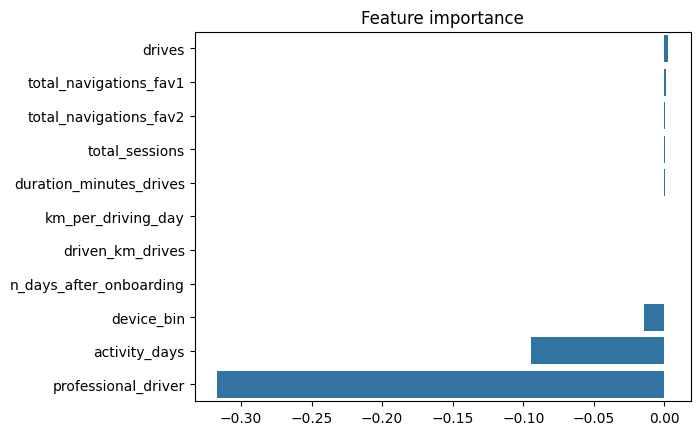

In [47]:
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### **Task 4c. Conclusion**

Now that the regression model has been built, the next step is to share the findings with the Waze leadership team. Consider the following questions:

**Questions:**


1. What variable most influenced the model's prediction? How? Was this surprising?

> _Looking at the provided coefficients, the variable that most influenced the model's prediction appears to be "professional_driver" due to its relatively large absolute coefficient value of -0.31698. This was not surprising, as this variable was very strongly correlated with `driving_days`, which was known from EDA to have a negative correlation with churn


2. Were there any variables that you expected to be stronger predictors than they were?

> _Yes. In previous EDA, user churn rate increased as the values in `km_per_driving_day` increased. The correlation heatmap here in this notebook revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it belongs to the least importants variables._

3. Why might a variable you thought to be important not be important in the model?

> _In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain._

4. Would you recommend that Waze use this model? Why or why not?

> _Given the balanced performance and the nature of the Waze application, it seems reasonable to consider using this model as a starting point.
Fine-tuning and optimizing the model based on specific business goals and feedback from domain experts could further improve its performance.
Continuous monitoring and updating of the model based on new data and changing user behavior are recommended._

5. What could you do to improve this model?

> _New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features._

6. What additional features would you like to have to help improve the model?

> _It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs._
